In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

In [2]:
data = pd.read_csv("DATA/Airpassengers.csv")

In [3]:
print(data.head())
print("\nData Types")
print(data.dtypes)
dateparse = lambda dates:pd.datetime.strptime(dates, '%Y-%m')
data=pd.read_csv("Airpassengers.csv",date_parser=dateparse)
print(data.head())
data.index

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

Data Types
Month          object
#Passengers     int64
dtype: object


FileNotFoundError: [Errno 2] No such file or directory: 'Airpassengers.csv'

In [4]:
ts=data["#Passengers"]

In [5]:
print(ts)

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64


In [6]:
ts.head()

0    112
1    118
2    132
3    129
4    121
Name: #Passengers, dtype: int64

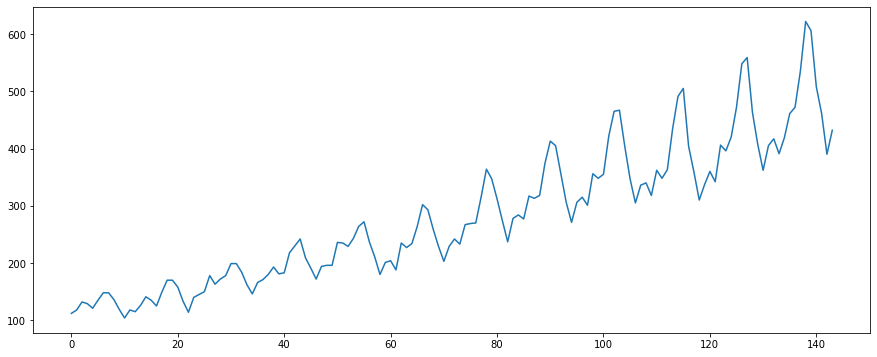

In [7]:
plt.plot(ts)

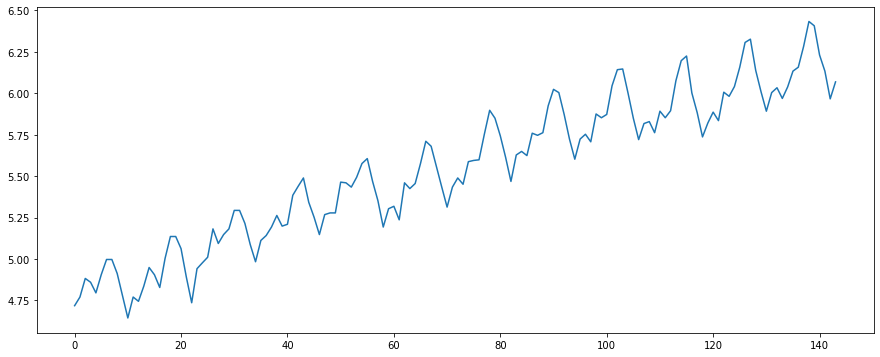

In [8]:
ts_log = np.log(ts)
plt.plot(ts_log)

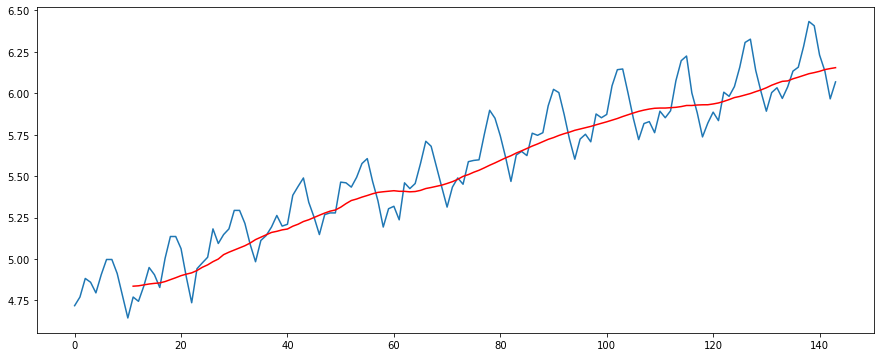

In [9]:
# moving average
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color="red") # mean

In [10]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11   -0.065494
Name: #Passengers, dtype: float64

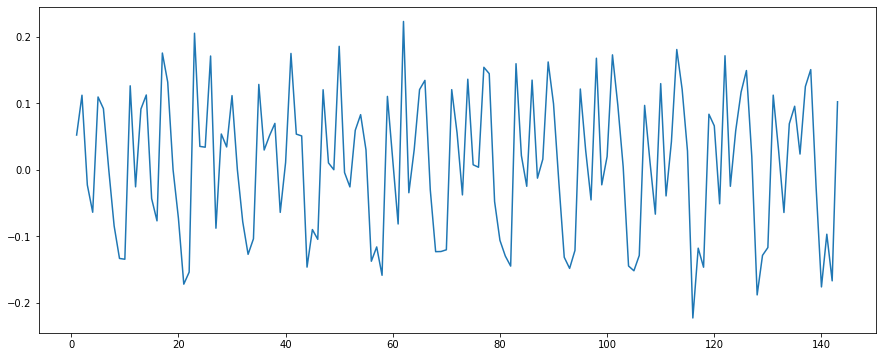

In [11]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()
ts_log_diff = ts_log-ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\knani\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


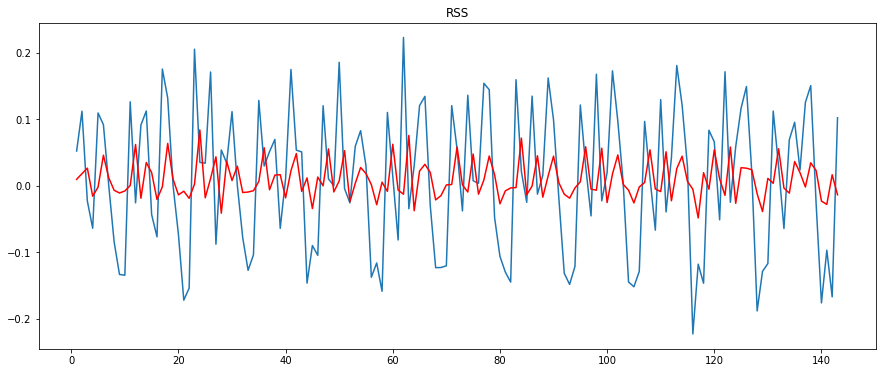

In [12]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.title('RSS')
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color="red")